<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Neural Networks

## *Data Science Unit 4 Sprint 2 Assignment 1*

## Define the Following:
You can add image, diagrams, whatever you need to ensure that you understand the concepts below.

### Input Layer: Receives input, data that is exposed, correlates to number of features
### Hidden Layer: Anything between input and output, data cannot be seen. Inside network they perform function
### The function is learnt
### Output Layer: Outputs vector values for whatever you need to address, helps with activation value one can ###interpret
### Single output, no activation predicts regression
### Sigmoid function represents the binary classification's probability
### one node for each item one tries to predict - Multi-class classification problems
### multi-target regression- one node for each regression prediction
### Neuron: a variable, something that holds a value
### Weight: parameter
### Activation Function: a logistic or sigmoid function, needs to produce a probability instead of output value, could be step functions, soft-max, relu
### Node Map: Nodes are for each item one is trying to predict
### Perceptron:A basic neural network with a input and output cell, a single node, all inputs going to one ouput ### evaluated by the weights, sums all the information together, passes the sum into an activation function

### Bias: number to add on before squishification - to make it to be more active or inactive -
### tells you how high the weighted sum needs to be before the neuron gets meaningfully active.
### we add all biases into a vector and add the vector into the previous matrix vector product
### Sigmoid: squishification function, which is applied to each existing component
### Deep learning: more hidden layers

## Inputs -> Outputs

### Explain the flow of information through a neural network from inputs to outputs. Be sure to include: inputs, weights, bias, and activation functions. How does it all flow from beginning to end?

#### Your Answer Here

## Write your own perceptron code that can correctly classify a NAND gate. 

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 1 |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 0 |

In [8]:
import pandas as pd
data = {
    'x1': [0,1,0,1],
    'x2': [0,0,1,1],
    'y': [1,1,1,0]
}
df = pd.DataFrame.from_dict(data)
df

,x1,x2,y
0,0,0,1
1,1,0,1
2,0,1,1
3,1,1,0


In [9]:
#initialize our weights

#calculate weighted sum of inputs and weights

#output the activated value for the end of 1 training epoch

class Perceptron(object):
  def __init__(self, rate = 0.01, niter = 10):
    self.rate = rate#learning rate
    self.niter = niter#number of iterations

  def fit(self, X, y):
    """Fit training data
    X : Training vectors, X.shape : [#samples, #features]
    y : Target values, y.shape : [#samples]
    """

    # weights
    self.weight = np.zeros(1 + X.shape[1])

    # Number of misclassifications
    self.errors = []  # Number of misclassifications

    for i in range(self.niter):
      err = 0
      for xi, target in zip(X, y):
        delta_w = self.rate * (target - self.predict(xi))#calculate sum of weights
        self.weight[1:] += delta_w * xi#update the weights
        self.weight[0] += delta_w
        err += int(delta_w != 0.0)
      self.errors.append(err)#update the error
    return self#return the whole thing

  def net_input(self, X):
    """Calculate net input"""
    return np.dot(X, self.weight[1:]) + self.weight[0]

  def predict(self, X):
    """Return class label after unit step"""
    return np.where(self.net_input(X) >= 0.0, 1, -1)

In [10]:
import numpy as np
y = df['y'].values
y = np.where(y == 1, -1, 1)
y

array([-1, -1, -1,  1])

In [12]:
X = df.iloc[0:100, [0, 2]].values
X

array([[0, 1],
       [1, 1],
       [0, 1],
       [1, 0]], dtype=int64)

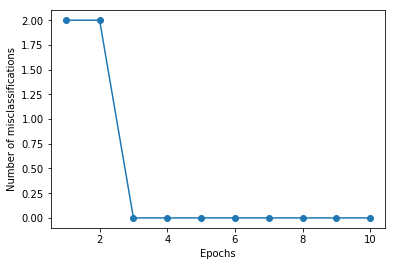

In [19]:
import matplotlib.pyplot as plt

pn = Perceptron(0.1, 10)
pn.fit(X, y)
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

## Implement your own Perceptron Class and use it to classify a binary dataset like: 
- [The Pima Indians Diabetes dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv) 
- [Titanic](https://raw.githubusercontent.com/ryanleeallred/datasets/master/titanic.csv)
- [A two-class version of the Iris dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/Iris.csv)

You may need to search for other's implementations in order to get inspiration for your own. There are *lots* of perceptron implementations on the internet with varying levels of sophistication and complexity. Whatever your approach, make sure you understand **every** line of your implementation and what its purpose is.

In [20]:
dd = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv')
dd.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [22]:
import numpy as np
y = dd['Outcome'].values
y = np.where(y == 1, -1, 1)
y

array([-1,  1, -1,  1, -1,  1, -1,  1, -1, -1,  1, -1,  1, -1, -1, -1, -1,
       -1,  1, -1,  1,  1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1, -1, -1, -1,  1,  1,  1, -1,  1, -1,  1,  1, -1,  1,  1,
        1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1, -1,  1, -1,  1,
        1,  1, -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,
        1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1, -1, -1, -1,  1,  1,
        1, -1,  1,  1,  1, -1, -1,  1,  1, -1, -1, -1, -1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1, -1, -1,  1,  1,  1, -1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,
       -1, -1,  1,  1,  1, -1,  1, -1,  1, -1,  1,  1,  1,  1,  1, -1, -1,
       -1, -1, -1,  1,  1, -1, -1,  1, -1,  1, -1, -1, -1,  1,  1,  1,  1,
        1,  1, -1, -1,  1, -1,  1,  1,  1, -1, -1, -1, -1,  1, -1, -1, -1,
       -1,  1,  1,  1,  1

In [30]:
X = dd[['Insulin', 'DiabetesPedigreeFunction']].values
X

array([[  0.   ,   0.627],
       [  0.   ,   0.351],
       [  0.   ,   0.672],
       ...,
       [112.   ,   0.245],
       [  0.   ,   0.349],
       [  0.   ,   0.315]])

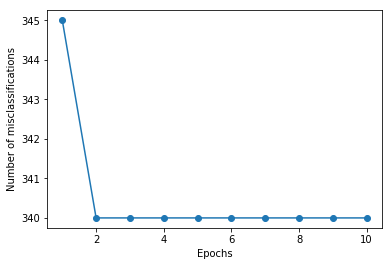

In [31]:
import matplotlib.pyplot as plt

pn = Perceptron(0.1, 10)
pn.fit(X, y)
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

## Stretch Goals:

- Research "backpropagation" to learn how weights get updated in neural networks (tomorrow's lecture). 
- Implement a multi-layer perceptron. (for non-linearly separable classes)
- Try and implement your own backpropagation algorithm.
- What are the pros and cons of the different activation functions? How should you decide between them for the different layers of a neural network?

In [ ]:
#backpropagation requires a lot of training data - how a single training example should be nudged to have the most rapid decrease to the cost function
#is the algorithmn that adds all the changes in weights and biases over all output neurons 
#in the second to last layer to get less error
#these changes are applied to weights and biases that determine the second to last layer, and the layer before that
#the backpropagation routine is done for every other training example - recording how each would like to change weights and biases
#the changes are the negative gradient of the cost function

#often training data is divided into mini-batches, a mini batch gives an approximation - stochastic gradient descent
